In [2]:
import pandas as pd
import numpy as np

import time
import requests
import datetime 
import logging
logging.getLogger('sqlalchemy.engine').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings("ignore")

import sys 
sys.path.append('C:/Users/dohyu/Desktop/Github/side_proj_fifa')

import matplotlib.pyplot as plt 
import matplotlib as mpl

mpl.rc('font', family = 'Malgun Gothic') # 한글 설정 (맑은 고딕)
mpl.rc('axes', unicode_minus = False) # 음수 부호 깨지는거 설정

import seaborn as sns 
import scipy.stats as stats

from sqlalchemy import create_engine, text

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sub_function import fetch_data, db_conn, position_rating, append_match_user_data

In [4]:
engine = db_conn('root', 'Dhyoon96!', '127.0.0.1', 'side_proj_fco')
df_query = 'SELECT * FROM match_user'
df1 = pd.read_sql(df_query, con = engine)

position_ratings_col = ['attack_position_ratings', 
                        'middle_position_ratings', 
                        'defense_position_ratings', 
                        'goalkeeper_position_ratings']

df2 = df1.drop(columns = ['match_id', 'user_ouid', 'user_nickname', 
                          'match_avg_rating', 'match_total_goal',
                          'match_total_dribble', 'match_total_pass_try', 'match_total_pass_suc',
                          'match_total_shoot', 'match_total_shoot_eff', 
                          'match_total_pass_short_suc', 
                          'match_total_pass_through_suc', 
                          'match_total_pass_long_suc', 
                          'match_total_shoot_outpenalty_suc', 
                          'match_total_shoot_inpenalty_suc']
                          + position_ratings_col)
                          
df2_temp = df2.drop(columns = ['match_result'])
print(df2.describe())

       match_possession  match_total_pass_short_try  \
count       1509.000000                 1509.000000   
mean          50.502319                   14.288270   
std           19.044400                   13.431909   
min            0.000000                    0.000000   
25%           41.000000                    4.000000   
50%           50.000000                   11.000000   
75%           60.000000                   21.000000   
max          100.000000                  102.000000   

       match_total_pass_long_try  match_total_pass_through_try  \
count                1509.000000                   1509.000000   
mean                    1.070908                      4.674619   
std                     1.522905                      4.986935   
min                     0.000000                      0.000000   
25%                     0.000000                      1.000000   
50%                     1.000000                      3.000000   
75%                     2.000000          

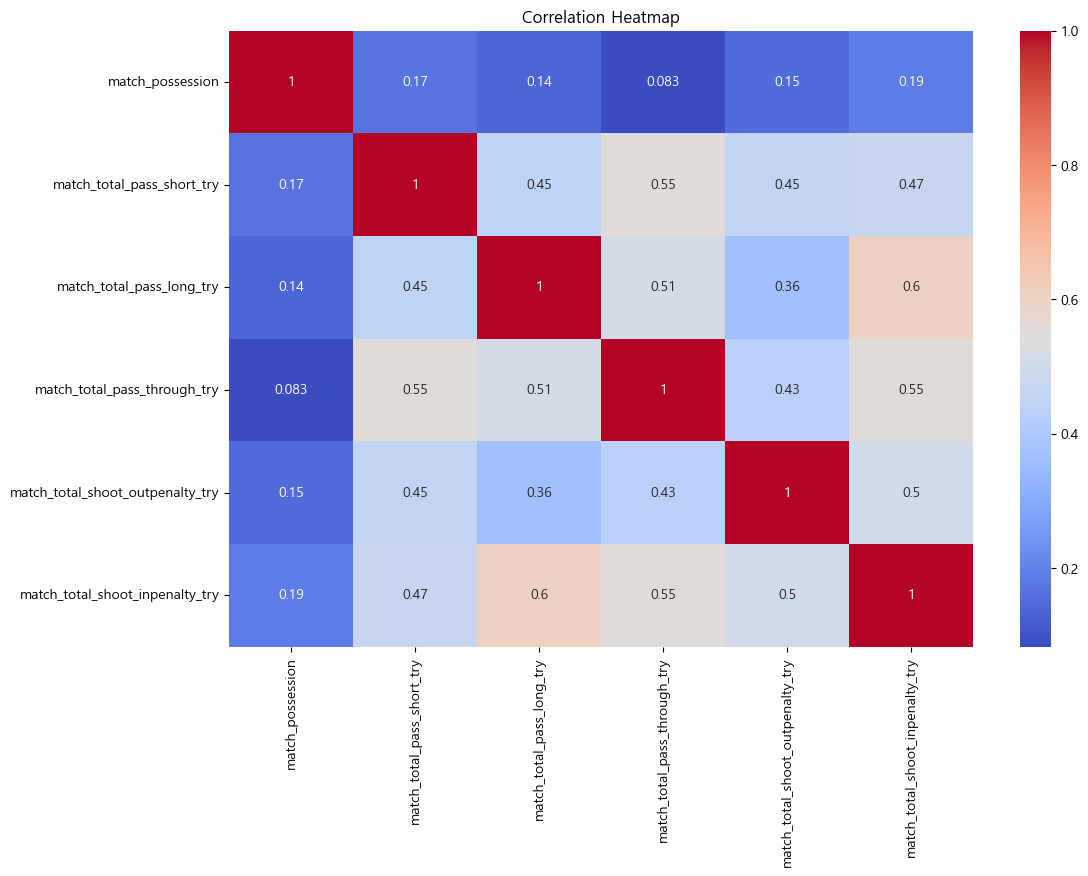

In [5]:
plt.figure(figsize=(12, 8))

correlation_matrix = df2_temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

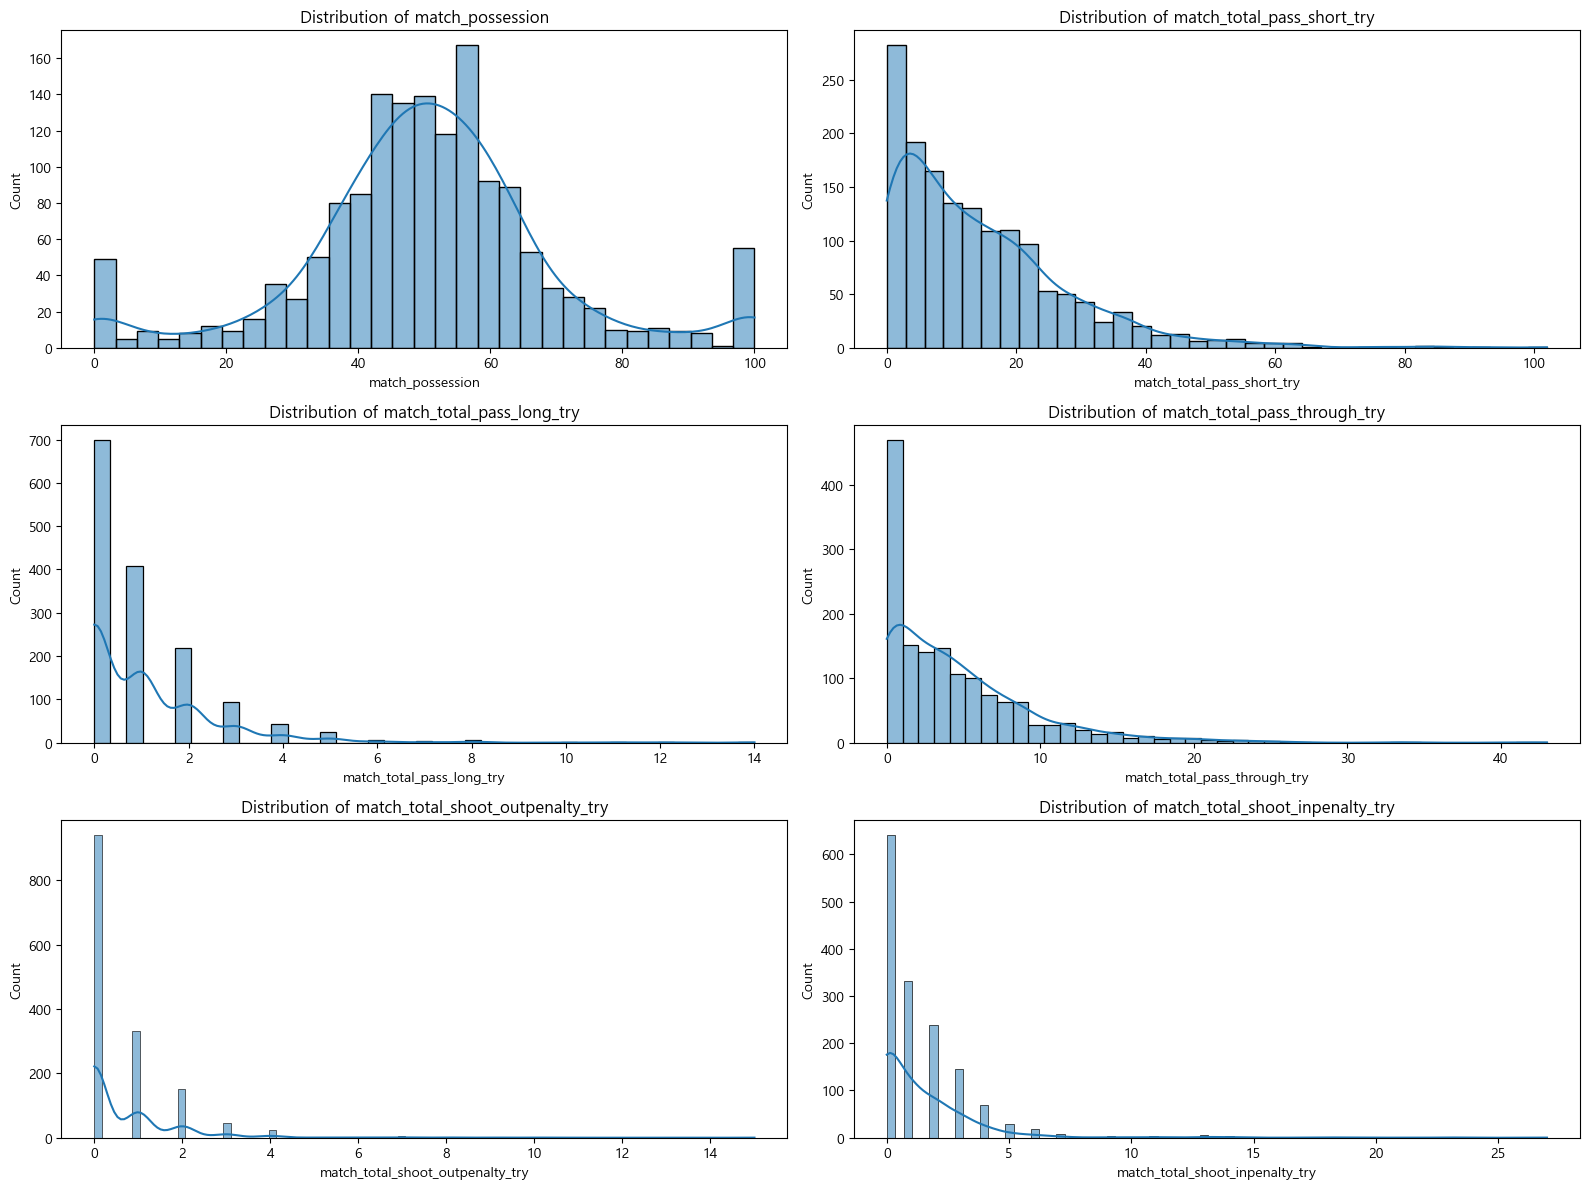

In [11]:

# Create subplots with a 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

# Initialize row and column indices
i, j = 0, 0

# Plot each column in a separate subplot
for column in df2_temp.columns:
    sns.histplot(df2_temp[column], kde=True, ax=axes[i, j])
    axes[i, j].set_title(f'Distribution of {column}')
    
    # Update column index
    j += 1
    # If column index exceeds the number of columns, reset it and update row index
    if j == 2:
        j = 0
        i += 1

# Adjust layout
plt.tight_layout()
plt.show()

Accuracy: 0.8344370860927153


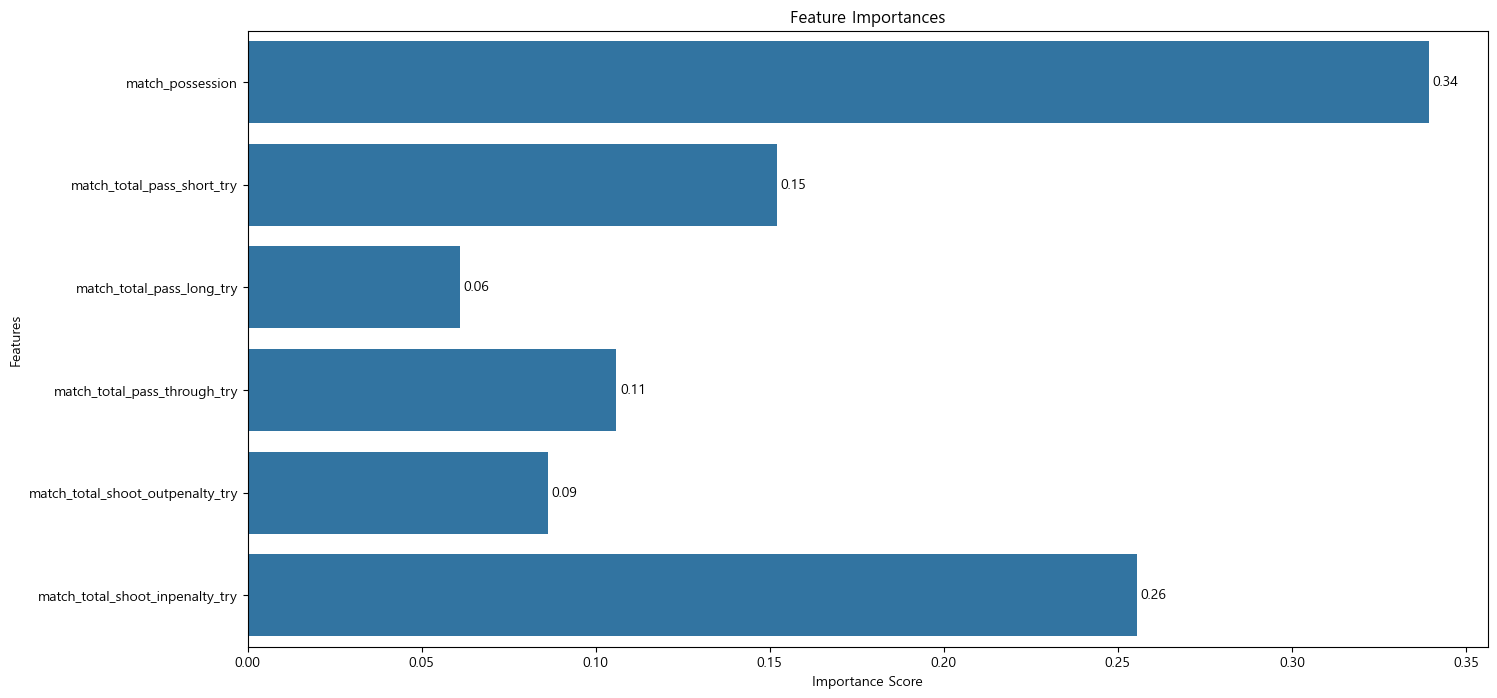

In [7]:
X = df2.drop(columns = ['match_result'])
y = df2['match_result']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize = (16, 8))
sns.barplot(x = feature_importances, y = features)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Add labels to the bars
for i, v in enumerate(feature_importances):
    plt.text(v + 0.001, i, str(round(v, 2)), color = 'black', va = 'center')

plt.show()